# Finding the Best Markets to Advertise In

This project is about how to use the statistic methods in Python to find the best way to promote our product and invest some money in advertisement. Our  products are courses on programming and most of them are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

The goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data ##

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). 

[FreeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey) and the data can be uploaded on [this page](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/raw-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
ncs = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning
pd.options.display.max_columns = 150 # to avoid truncated output 
ncs.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
ncs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


The columns that can be interesting for our research:
- Age
- CityPopulation
- CountryLive, 
- EmploymentField 
-EmploymentStatus
- ExpectedEarning
- Gender
- JobApplyWhen
- JobPref
- MoneyForLearning 
- MoneyForLearning
- JobRoleInterest
- MonthsProgramming
- SchoolDegree

## Checking for Sample Representativity 

Let's figure out whether the sample we have is representative for our population of interest.

In [3]:
# percentages for frequency distribution of 'JobRoleInterest' column
freq_table_job = ncs['JobRoleInterest'].value_counts(normalize=True) * 100
print(freq_table_job)

Full-Stack Web Developer                                                                                                                                                        11.770595
  Front-End Web Developer                                                                                                                                                        6.435927
  Data Scientist                                                                                                                                                                 2.173913
Back-End Web Developer                                                                                                                                                           2.030892
  Mobile Developer                                                                                                                                                               1.673341
Game Developer                                                        

From frequency distribution of column 'JobRoleInterest' we can see that: 
- most people interested in job role like Full-Stack Web Developer, Front-End Web Developer, and Data Scientist 
- a lot of people have more than one job role


Let's count how many people have one and more job precedences:
1. remove Nan values
2. split strings with commas
3. write the function for counting srting length
4. apply the function
5. count the most popular answers

In [4]:
print(ncs['JobRoleInterest'].head(15))

# use Series.dropna() method to return a new Series with missing values removed.
job_interests = ncs['JobRoleInterest'].dropna()

# use Series.str.split() to split the string with commas
splitted_interests = job_interests.str.split(',')

0                                                   NaN
1                              Full-Stack Web Developer
2       Front-End Web Developer, Back-End Web Develo...
3       Front-End Web Developer, Full-Stack Web Deve...
4     Full-Stack Web Developer, Information Security...
5                                                   NaN
6                              Full-Stack Web Developer
7                                                   NaN
8                                                   NaN
9     Full-Stack Web Developer,   Quality Assurance ...
10                                                  NaN
11      DevOps / SysAdmin,   Data Scientist, Informa...
12                                                  NaN
13    Back-End Web Developer, Full-Stack Web Develop...
14                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object


In [5]:
# write the function
def count_len(x):
    return len(x)

# apply the function
ncs['new_col'] = splitted_interests.apply(count_len)

In [6]:
# count the most popular answers
most_interested = ncs['new_col'].value_counts(normalize = True).sort_index() * 100
print(most_interested)

1.0     31.650458
2.0     10.883867
3.0     15.889588
4.0     15.217391
5.0     12.042334
6.0      6.721968
7.0      3.861556
8.0      1.759153
9.0      0.986842
10.0     0.471968
11.0     0.185927
12.0     0.300343
13.0     0.028604
Name: new_col, dtype: float64


So we see that:
- 31.6% of people have one job precedence
- most of people (approximately 52%) have 2-5 job precedences. It tells us that people have not yet chosen their proffession and they consider several options.


The focus of our interests is on web and mobile development. Let's find out how many people are interested in at least one of these two subjects

In [7]:
# find out number of people who interested in web development
pattern1 = r'[Ww]eb'
web = ncs['JobRoleInterest'].str.contains(pattern1).sum()
print(web) 

#find out number of people who interested in mobile development
pattern2 = r'[Mm]obile'
mobile = ncs['JobRoleInterest'].str.contains(pattern2).sum()
print(mobile)

5781
2305


In [8]:
#make a new dataframe 
dfr = pd.DataFrame(data = [web, mobile], columns = ['total'])
dfr.index = 'web', 'mobile'
dfr

,total
web,5781
mobile,2305


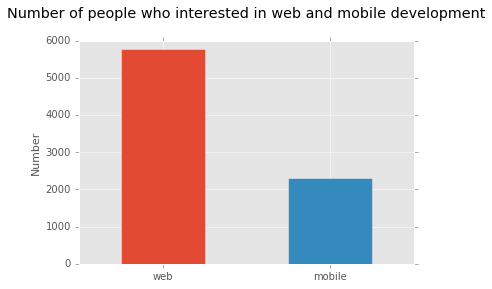

In [9]:
%matplotlib inline
plt.style.use('ggplot')

#generate a bar plot 
dfr['total'].plot.bar(rot = 0)
plt.title('Number of people who interested in web and mobile development', y = 1.08)
plt.ylabel('Number', fontsize = 11)

## New Coders - Locations and Densities

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

In [10]:
# drop all the rows where participants didn't answer what role they are interested in
ncs_new = ncs[ncs['JobRoleInterest'].notnull()].copy()


In [11]:
#generate the absolute frequence
freq_table_abs = ncs_new['CountryLive'].value_counts(ascending=False)
freq_table_abs.head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [12]:
#generate the relative frequence
freq_table_rel = ncs_new['CountryLive'].value_counts(normalize=True,ascending=False)*100
freq_table_rel.head(10)

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

## Spending Money for Learning

Let's figure out how much money new coders are actually willing to spend on learning.

In [13]:
# replace the 0 values to 1 for avoiding dividing by 0
ncs_new['MonthsProgramming'].replace(0,1, inplace = True)


In [14]:
# create a new column that describes the amount of money a student has spent per month 
# (at the moment they completed the survey)
ncs_new['money_per_month'] = ncs_new['MoneyForLearning'] / ncs_new['MonthsProgramming']

ncs_new['money_per_month'].head(10)

1      13.333333
2     200.000000
3       0.000000
4       0.000000
6       0.000000
9       5.555556
11      0.000000
13           NaN
14           NaN
15      0.000000
Name: money_per_month, dtype: float64

In [15]:
# find out how many null values there are in the 'money_per_month' column
ncs_new['money_per_month'].isnull().sum()



675

In [16]:
# keep only the rows that don't have a null value for the money_per_month column
ncs_new = ncs_new[ncs_new['money_per_month'].notnull()]


In [17]:
# remove any rows that have null values in the CountryLive column
ncs_new = ncs_new[ncs_new['CountryLive'].notnull()]


In [18]:
#find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada 
mean_country = ncs_new.groupby('CountryLive').mean()

mean_country['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]



CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

In [19]:
#find out the median 
median_country = ncs_new.groupby('CountryLive').median()

median_country['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]


CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: money_per_month, dtype: float64

The results are unusual because we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



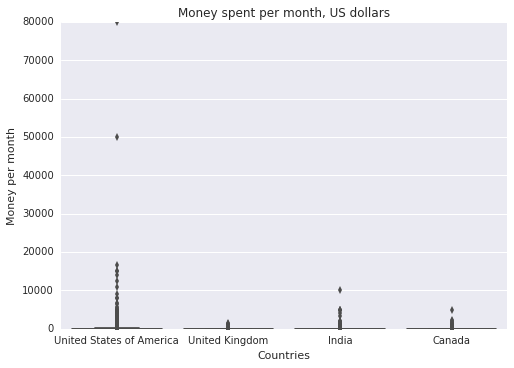

In [20]:
import seaborn as sns

four_countries = ncs_new[ncs_new['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(x='CountryLive', y='money_per_month', data=four_countries)
plt.title('Money spent per month, US dollars')
plt.ylabel('Money per month', fontsize = 11)
plt.xlabel('Countries', fontsize = 11)
plt.show()

In [21]:
#isolate respondents who spent more than 10000$ per month
ncs_new = ncs_new[ncs_new['money_per_month'] < 10000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



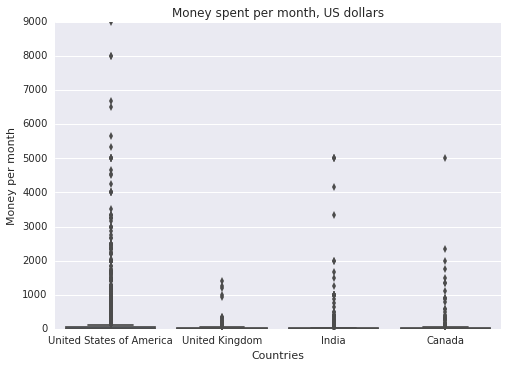

In [22]:
#make a new graph
four_countries = ncs_new[ncs_new['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(x='CountryLive', y='money_per_month', data=four_countries)
plt.title('Money spent per month, US dollars')
plt.ylabel('Money per month', fontsize = 11)
plt.xlabel('Countries', fontsize = 11)
plt.show()

Now we should explore every outliers from these countries. Lets start with USA.

In [23]:
usa = four_countries[(four_countries['CountryLive'] == 'United States of America') &
                     (four_countries['money_per_month'] >= 6000) 
                     ]
usa

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,new_col,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,

We see that all these people attended the bootcamps and spent much money with it so I'm sure they wouldn't be interested in our advertising. Using this logic lets see what situation with other 3 countries is.


In [24]:
uk = four_countries[(four_countries['money_per_month'] >= 700) & 
                    (four_countries['CountryLive'] == 'United Kingdom')]
uk

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,new_col,money_per_month
3645,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Czech Republic,United Kingdom,NaN,NaN,Not working and not looking for work,NaN,25000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,NaN,21.0,4e44f8d6bb0d74b974c29b9c188bd684,07a06de301d06ce7e960b8713598db5b,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,Front-End Web Developer,in an office with other developers,Czech,"single, never married",1200.0,1.0,d4bb652514,2017-03-12 20:30:49,2017-03-12 19:25:10,2017-03-12 20:33:05,2017-03-12 20:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,"professional degree (MBA, MD, JD, etc.)",Economics,2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1200.00
6127,23.0,1.0,1.0,1.0,General Assembly,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slovakia,United Kingdom,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,f0e81c452041f52c3de4a32961a8de03,edff84bd0e257c32be2b54341d03ed21,NaN,0.0,0.0,0.0,NaN,I'm already applying,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,0.0,"Full-Stack Web Developer, Front-End Web Deve...",no preference,Slovak,"single, never married",10000.0,8.0,e0a09cc88d,2017-03-19 13:45:28,2017-03-19 13:41:54,2017-03-19 13:47:01,2017-03-19 13:45:32,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,high school diploma or equivalent (G

The same situation with UK but we don't why people who weren't attend the bootcamps spent much money

In [25]:
india = four_countries[
    (four_countries['CountryLive'] == 'India') & 
    (four_countries['money_per_month'] >= 2500)]

india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,new_col,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,Na

We can't conclude why people from India spent so much money for learning too.


In [26]:
canada = four_countries[(four_countries['money_per_month'] >= 3000) & 
                        (four_countries['CountryLive'] == 'Canada')]

canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,new_col,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,5000.0


We see that in Canada one human spent a lot of money for learning in bootcamp.

Next step is to remove the extreme outliers from United States of America, India, United Kingdom, Canada.


In [27]:
four_countries = four_countries.drop(canada.index)
four_countries = four_countries.drop(india.index)
four_countries = four_countries.drop(usa.index)
four_countries = four_countries.drop(uk.index)                                                                                                                            

Lets compute new mean for our markets

In [44]:
mean_country_new = four_countries.groupby('CountryLive').mean()

mean_country_new['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]


CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               25.245838
Canada                       93.065400
Name: money_per_month, dtype: float64

## Choosing the Two Best Markets

After removing the outliers and counting new mean for United States of America, India, United Kingdom and Canada we can see that one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

For choosing second country for advertising lets compare the total number of potential customers.

In [53]:
summary_df = pd.DataFrame()                                                 
summary_df['Money per month'] = mean_country_new['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]
summary_df['Total number customer'] = four_countries['CountryLive'].value_counts()
summary_df['% total of number customer'] = four_countries['CountryLive'].value_counts(normalize=True)*100

summary_df                                    

,Money per month,Total number customer,% total of number customer
CountryLive,,,
United States of America,142.654608,2920,75.064267
India,65.758763,457,11.748072
United Kingdom,25.245838,274,7.043702
Canada,93.065400,239,6.143959


Lets make a pie chart

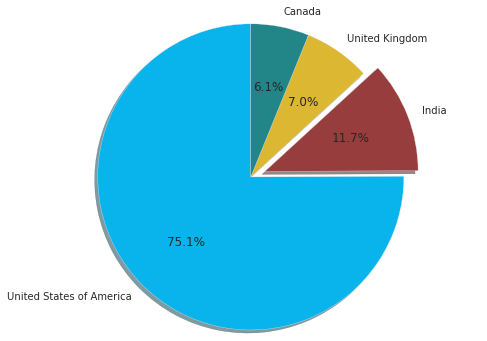

In [64]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'United States of America', 'India', 'United Kingdom', 'Canada'
sizes = four_countries['CountryLive'].value_counts(normalize=True)*100
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'India')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=("#09b4ed", "#983D3D", "#DCB732", "#228587"), 
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Based on all of the results I think that India might be better for our advertising because of number of potential customers. If our company had a marketing team, it  would be a good dicision to discuss with them about a Canada market too because it might make sense to advertise in more then two countries. The same situation with splitting the advertising budget unequally (for instance spend 70% to advertise in the US and 30% to advertise in India), this might been discussed with marketing team.